## Neural Networks: smol guide & examples

from https://pad.gwdg.de/s/Machine_Learning_For_Physicists_2021#

### Basic NN (no hidden layers):

In [ ]:
from numpy import * 

N0=3 #Input layer size
N1=2 #Output layer size

w=random.uniform(low=-1, high=+1, size=(N1,N0)) #Weights
b=random.uniform(low=-1, high=+1, size=N1) #Bias

y_in=array([0.2, 0.4, -0.1]) #Input layer of values

z=dot(w,y_in)+b #Weighted sum of input values

y_out=1/(1+exp(-z)) #Sigmoid function (activate function)

def apply_net(y_in):
    global w,b
    
    z=dot(w,y_in)+b
    return(1/(1+exp(-z)))

### Multilayer NN:

In [ ]:
#Define the operation of a layer
def apply_layer(y_in,w,b):  #Weights and biases are no longer global, they change from layer to layer
    
    z=dot(w,y_in)+b
    return(1/(1+exp(-z)))

N0=2 #Input layer size
N1=30 #Hidden layer size
N2=1 #Output layer size

#FROM INPUT LAYER TO HIDDEN LAYER:
w1=random.uniform(low=-10, high=+10, size=(N1,N0)) #Weights, size is always (output dimension x input dimension)
b1=random.uniform(low=-1, high=+1, size=N1) #Bias

#FROM HIDDEN LAYER TO OUTPUT LAYER:
w2=random.uniform(low=-10, high=+10, size=(N2,N1)) #Weights
b2=random.uniform(low=-1, high=+1, size=N2) #Bias

#Define the network: succession of layers
def apply_net(y_in):
    global w1,b1,w2,b2
    
    y1=apply_layer(y_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

### NN with many hidden layers:

In [ ]:
#Define the operation of a layer
def apply_layer(y_in,w,b):  #Weights and biases are no longer global, they change from layer to layer
    
    z=dot(w,y_in)+b
    return(1/(1+exp(-z)))

Nlayers=20 
LayerSize=100

Weights=random.uniform(low=-3, high=3, size=[Nlayers,LayerSize,LayerSize])
Biases=random.uniform(low=-1, high=1, size=[Nlayers,LayerSize])

#First hidden layer (coming in from the input layer)
WeightsFirst=random.uniform(low=-1, high=+1, size=[2,LayerSize]) 
BiasesFirst=random.uniform(low=-1, high=+1, size=LayerSize) 

#Final layer (output neuron)
WeightsFinal=random.uniform(low=-1, high=+1, size=[LayerSize,1]) 
BiasesFinal=random.uniform(low=-1, high=+1, size=1) 

#Define the network: succession of layers
def apply_multi_net(y_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers
    
    y=apply_layer(y_in,WeightsFirst,BiasesFirst)
    for j in range(Nlayers):
        y=apply_layer(y,Weights[j,:,:],Biases[j,:])
        
    output=apply_layer(y,WeigthsFinal,BiasesFinal)
    return(output)

### Backpropagation implementation

           VARIABLE - DIMENSIONS:

           y[layer] - batchsize x neurons[layer]

              delta - batchsize x neurons[layer]

     Weights[layer] - neurons[lower layer] x neurons[layer]

      Biases[layer] - neurons[layer]


In [ ]:
dWeights[layer]=dot(transpose(y[lower layer]),Delta)/batchsize
dBiases[layer]=Delta.sum(0)/batchsize

Delta=dot(Delta,transpose(Weights))*df_layer[lower layer]

Store the weights and biases on two lists "Weights" and "Biases":

e.g., for 3 layers (except input)

    Layer 3: Biases[2], Weights[2], y_layer[3], df_layer[2] (stores f'(z))
    
    Layer 2: Biases[1], Weights[1], y_layer[2], df_layer[1] (stores f'(z))

    Layer 1: Biases[0], Weights[0] (2x3 matrix), y_layer[1], df_layer[0] (stores f'(z))
   
    Layer 0: y_layer[3] (input layer)

### Neural Network: 

General purpose algorithm: feedforward & backpropagation

Problem-specific: 

    1. Choose network layout - Hyperparameters
        # layers
        # neurons per layer
        Type of non-linear function
        Maybe specialized structures for weights/biases
    2. Generate training / validation / test samples
    3. Monitor / Optimize training process - Hyperparameters
        Choose learning rate (eta) & batch size, etc.

In [ ]:
# Calculate f(z) -non-linear function- and f'(z) -its derivative-
def net_f_df(z): 
    val=1/(1+exp(-z))
    return(val,exp(-z)*val(**2)) # Returns f and f' which makes it more efficient

# FORWARD PROPAGATION:
# Calculate the values in next layer. One forward step through the network: goven the old values 'y', 
# calculate (1) first my linear step 'z' and (2) apply the non-linear function:
def forward_step(y,w,b): # w=weights, b=bias in next layer
    z=dot(y,w)+b 
    return(net_f_df(z)) # Apply non-linearity

# Function that runs the full network: (1) put the values of the input neurons 'y_in'on the function, 
# (2) start at the lowest layer 'y=y_in, y_layer[0]=y', (3) range through all the layers from lowest
# to top while storing all the values (df, y) and (4) return the highest value 'y'
def apply_net(y_in): 
    global Weights, Biases, NumLayers
    global y_layer, df_layer
    y=y_in
    y_layer[0]=y
    for j in range(NumLayers): # Loop through all layers, j=0 corresponds to the 1st layer above input
        y,df_forward_step(y,Weights[j],Biases[j])
        df_layer[j]=df # Store f'(z)
        y_layer[j+1]=y # Store f(z)
    return(y)
# We store all the values df and y because we will need for backpropagation as it depends on things like f'(z), i.e., df(z),
# at the corresponding layer; these are the z's I've calculated before during the forward propagation.

# BACKWARD PROPAGATION:
# Delta at layer N, of batchsize x layersize(N); w[layersize(N-1) x layersize(N) matrix]; 
# df=df/dz at layer N-1, of batchsize x layersize(N-1)
def backward_step(delta,w,df):
    return(dot(delta,transpose(w))*df) # Deviation vector (delta) multiplied by the weight matrix w and f'(z)

# One backward pass; result will be 'dw_layer' matrices with the derivatives of the 
# cost fuction with respect to the corresponding weight (similar for biases).
# (1) I tell the algorithm what whould have been the correct value (y_target)
# (2) Calculate the deviation vector 'delta' which is essentially the difference between the correct value (y_target)
# and the actual output (y_layer)
# (3) Range through all the layers
# (4) Collect all the gradients of my cost function with respect to the weights of the layer (dw_layer) 
# -similar for bias, db_layer -
def backdrop(y_target):
    global y_layer, df_layer, Weights, Biases, NumLayers
    global dw_layer, db_layer # dCost/dw and dCost/db
    global batchsize
    
    delta=(y_layer[-1]-y_target)*df_layer[-1] # Index [-1] means the LAST index (i.e., the higher layer)
    dw_layer[-1]=dot(transpose(y_layer[-2]),delta)/batchsize
    db_layer[-1]=delta.sum(0)/batchsize
    for j in range(NumLayers-1): # Range through all the layers
        delta=backward_step(delta,Weights[-1-j],df_layer[-2-j])
        dw_layer[-2-j]=dot(transpose(y_layer[-3-j]),delta)/batchsize
        db_layer[-2-j]=delta.sum(0)/batchsize 

### (1) Implement backpropagation: example

In [80]:
from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace, transpose
import matplotlib.pyplot as plt # for plotting
import matplotlib 
matplotlib.rcParams['figure.dpi']=100 # highres display

##### Define the function that applies the non-linear function

In [52]:
def net_f_df(z): # calculate f(z) and f'(z)
    val=1/(1+exp(-z)) # sigmoid
    return(val,exp(-z)*(val**2)) # return both f and f'

##### Define the function that applies 1 forward step

In [53]:
def forward_step(y,w,b): # calculate values in next layer, from input y
    z=dot(y,w)+b # w=weights, b=bias vector for next layer
    return(net_f_df(z)) # apply nonlinearity and return result

##### Define the function that goes forward through all the layers from input to output: given the input values, outputs the result

In [54]:
def apply_net(y_in): # one forward pass through the network
    global Weights, Biases, NumLayers
    global y_layer, df_layer # for storing y-values and df/dz values
    
    y=y_in # start with input values
    y_layer[0]=y
    for j in range(NumLayers): # loop through all layers
        # j=0 corresponds to the first layer above the input
        y,df=forward_step(y,Weights[j],Biases[j]) # one step
        df_layer[j]=df # store f'(z) [needed later in backprop]
        y_layer[j+1]=y # store f(z) [also needed in backprop]        
    return(y)

In [55]:
def apply_net_simple(y_in): # one forward pass through the network
    # no storage for backprop (this is used for simple tests)

    y=y_in # start with input values
    y_layer[0]=y
    for j in range(NumLayers): # loop through all layers
        # j=0 corresponds to the first layer above the input
        y,df=forward_step(y,Weights[j],Biases[j]) # one step
    return(y)

##### Define the function that applies 1 step of backpropagation

In [56]:
def backward_step(delta,w,df): 
    # delta at layer N, of batchsize x layersize(N))
    # w between N-1 and N [layersize(N-1) x layersize(N) matrix]
    # df = df/dz at layer N-1, of batchsize x layersize(N-1)
    return(dot(delta,transpose(w))*df )

##### Define the function that applies the full backpropagation: stored values from forward pass are used in backpropagation

In [57]:
def backprop(y_target): # one backward pass through the network
    # the result will be the 'dw_layer' matrices that contain
    # the derivatives of the cost function with respect to
    # the corresponding weight
    global y_layer, df_layer, Weights, Biases, NumLayers
    global dw_layer, db_layer # dCost/dw and dCost/db (w,b=weights,biases)
    global batchsize
    
    delta=(y_layer[-1]-y_target)*df_layer[-1]
    dw_layer[-1]=dot(transpose(y_layer[-2]),delta)/batchsize
    db_layer[-1]=delta.sum(0)/batchsize
    for j in range(NumLayers-1):
        delta=backward_step(delta,Weights[-1-j],df_layer[-2-j])
        dw_layer[-2-j]=dot(transpose(y_layer[-3-j]),delta)
        db_layer[-2-j]=delta.sum(0)/batchsize

##### Gradient step: takes the gradients that have been calculated by the backpropagation (i.e., dw_layer) and changes the weights of the layer in the direction of the negative gradient.  Learning rate (eta) tells me how large are the steps -should not be too large neither too small - 

In [58]:
def gradient_step(eta): # update weights & biases (after backprop!)
    global dw_layer, db_layer, Weights, Biases
    
    for j in range(NumLayers):
        Weights[j]-=eta*dw_layer[j]
        Biases[j]-=eta*db_layer[j]

In [59]:
def train_net(y_in,y_target,eta): # one full training batch
    # y_in is an array of size batchsize x (input-layer-size)
    # y_target is an array of size batchsize x (output-layer-size)
    # eta is the stepsize for the gradient descent
    global y_out_result
    
    y_out_result=apply_net(y_in)
    backprop(y_target)
    gradient_step(eta)
    cost=((y_target-y_out_result)**2).sum()/batchsize
    return(cost)

##### Train the net to reproduce a 2D function

##### Train the net to reproduce a 2D function - Produce random batches: randomly sample a function defined on a 2D square

In [60]:
# Set up rectified linear units (relu) instead of sigmoid
def net_f_df(z): # calculate f(z) and f'(z)
    val=z*(z>0)
    return(val,z>0) # return both f and f'

##### Weights are defined from a random function (in this case)

In [61]:
# set up all the weights and biases

NumLayers=2 # does not count input-layer (but does count output)
LayerSizes=[2,100,1] # input-layer,hidden-1,hidden-2,...,output-layer

Weights=[random.uniform(low=-0.1,high=+0.1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
Biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# set up all the helper variables

y_layer=[zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dw_layer=[zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

In [71]:
# define the batchsize
batchsize=1000

##### Define the function we want to have (desired outcome)

In [72]:
# For a change: Set up rectified linear units (relu) 
# instead of sigmoid
def net_f_df(z): # calculate f(z) and f'(z)
    val=z*(z>0)
    return(val,z>0) # return both f and f'

##### Pick batchsize random positions in 2D square

In [76]:
def make_batch():
    global batchsize

    inputs=random.uniform(low=-0.5,high=+0.5,size=[batchsize,2])
    targets=zeros([batchsize,1]) # must have right dimensions
    targets[:,0]=myFunc(inputs[:,0],inputs[:,1])
    return(inputs,targets)

##### Do the training:

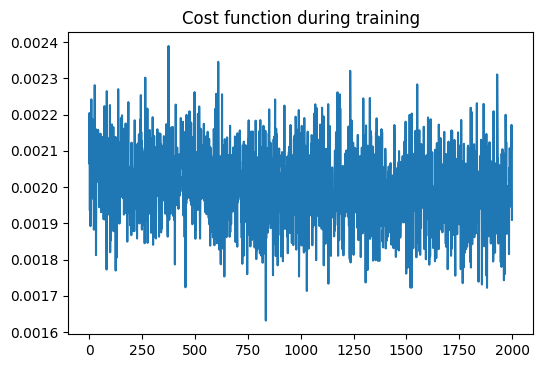

In [81]:
# Train on randomly sampled points to make the network reproduce better and better this 2D function!
eta=.001
batches=2000
costs=zeros(batches)

for k in range(batches):
    y_in,y_target=make_batch()
    costs[k]=train_net(y_in,y_target,eta)

plt.plot(costs)
plt.title("Cost function during training")
plt.show()

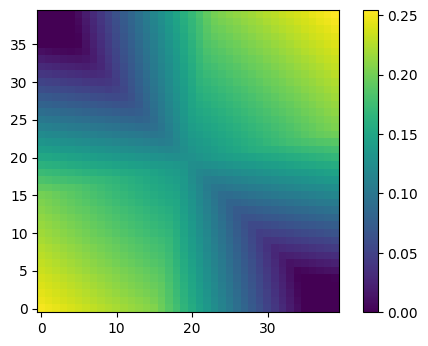

In [83]:
# try to evaluate the (randomly initialized) network
# on some area in the 2D plane
test_batchsize=shape(X0)[0]*shape(X0)[1]
testsample=zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

testoutput=apply_net_simple(testsample)
myim=plt.imshow(reshape(testoutput,shape(X0)),origin='lower',interpolation='none')
plt.colorbar()
plt.show()

#### Animate the NN results during training

In [84]:
# start fresh:

# set up all the weights and biases

NumLayers=2 # does not count input-layer (but does count output)
LayerSizes=[2,100,1] # input-layer,hidden-1,hidden-2,...,output-layer

Weights=[random.uniform(low=-0.1,high=+0.1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
Biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# set up all the helper variables

y_layer=[zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dw_layer=[zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

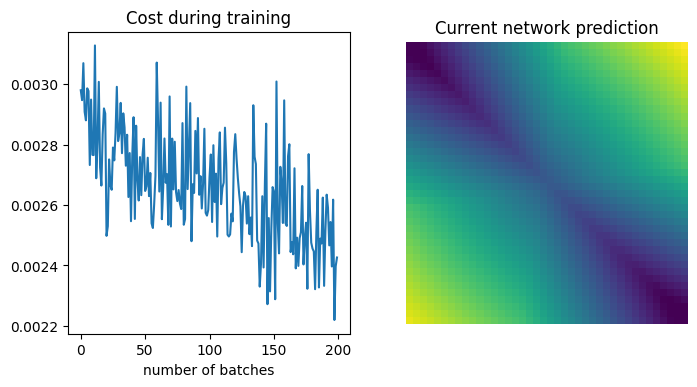

In [87]:
# import functions for updating display 
# (simple animation)
from IPython.display import clear_output
from time import sleep

eta=0.01 # learning rate
nsteps=100

costs=zeros(nsteps)
for j in range(nsteps):
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,4)) # prepare figure
    ax[1].axis('off') # no axes
    
    # the crucial lines:
    y_in,y_target=make_batch() # random samples (points in 2D)
    costs[j]=train_net(y_in,y_target,eta) # train network (one step, on this batch)
    testoutput=apply_net_simple(testsample) # check the new network output in the plane
    
    img=ax[1].imshow(reshape(testoutput,shape(X0)),interpolation='nearest',origin='lower') # plot image
    ax[0].plot(costs)
    
    ax[0].set_title("Cost during training")
    ax[0].set_xlabel("number of batches")
    ax[1].set_title("Current network prediction")
    plt.show()
    sleep(0.1)